Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

# <font color='red'>Step1:Data Reading/Data Understanding	</font>


### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
#Mount your google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/Skincancer/Train")
data_dir_test = pathlib.Path('/content/gdrive/MyDrive/Skincancer/Test')

In [4]:
#Get the count of train and test set
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


#### <font color='orange'>2239 images are available for training set and 118 images are available for test </font>

# <font color='red'>Step2:Dataset Creation</font>

In [5]:
#Set the batch size and image size to be used
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [6]:
## Create train & validation dataset from the train directory with a batch size of 32
## Resize images to 180*180.(10%)

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [8]:
## Write  validation dataset here
val_ds = val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


#### <font color='orange'>Out of 2329 images from training set-1792 images are used for training and remaining 447 images are used for validation</font>

In [9]:
# List out all the classes of skin cancer

class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


# <font color='red'>Step3:Data Visualization</font>

Create a code to visualize one instance of all the nine classes present in the dataset

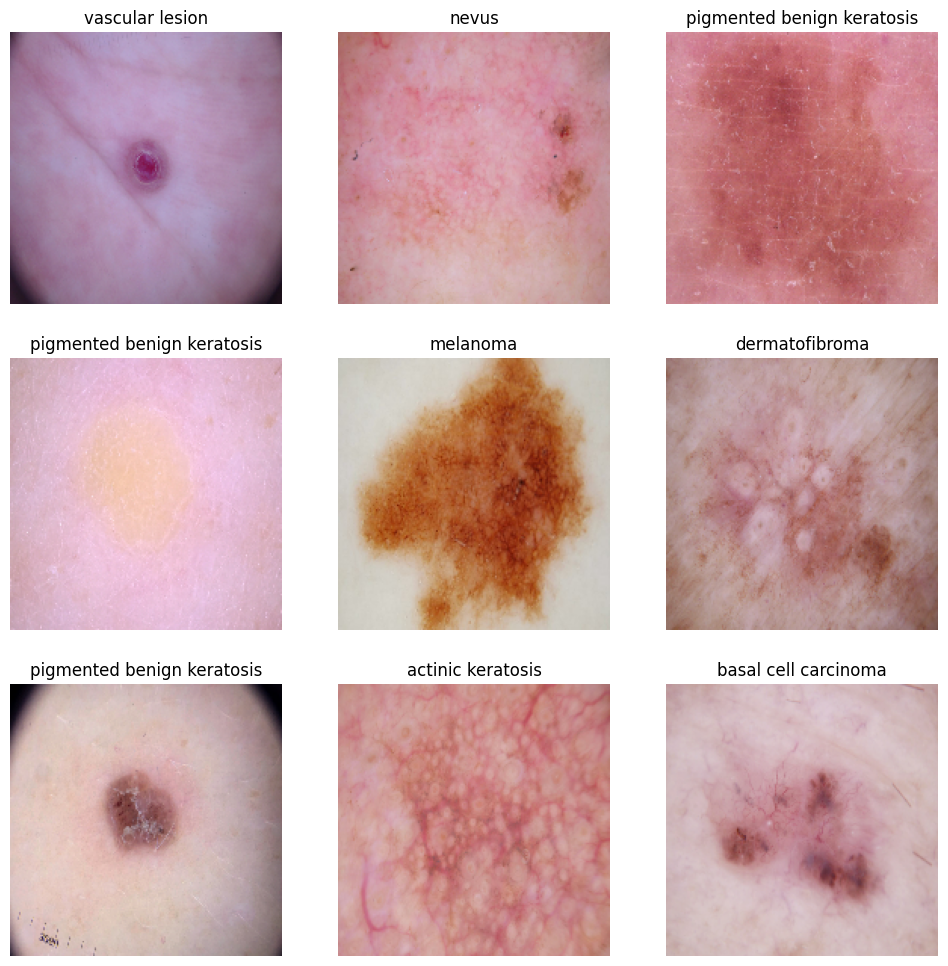

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12))
for img,labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(img[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# <font color='red'>Step4:Model Building & training</font>

### Build the model

In [12]:
num_classes = 9
#Sequential model
model = Sequential([
  #Rescaling
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

  #First convolution layer
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  #Second convolution layer
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  #Third convolution layer
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  #Dropout layer with 20%  of the input units to drop.
  layers.Dropout(0.2),

  #Flatten layer
  layers.Flatten(),

  #Fully connected layer
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='softmax')

])

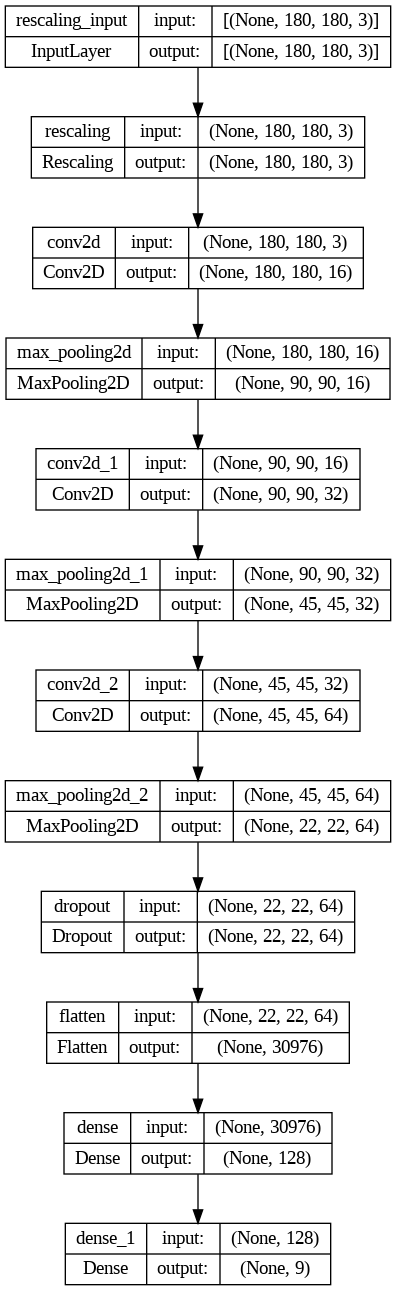

In [13]:
# vizualizing the model
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

### Compile the model


In [14]:
### Choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

### Train the model

In [16]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


56/56 [==============================] - 562s 2s/step - loss: 2.0165 - accuracy: 0.2712 - val_loss: 1.8267 - val_accuracy: 0.3289
Epoch 2/20
56/56 [==============================] - 1s 25ms/step - loss: 1.7230 - accuracy: 0.3934 - val_loss: 1.5905 - val_accuracy: 0.4183
Epoch 3/20
56/56 [==============================] - 1s 25ms/step - loss: 1.4678 - accuracy: 0.4950 - val_loss: 1.4349 - val_accuracy: 0.4922
Epoch 4/20
56/56 [==============================] - 1s 27ms/step - loss: 1.3541 - accuracy: 0.5318 - val_loss: 1.3873 - val_accuracy: 0.5213
Epoch 5/20
56/56 [==============================] - 2s 27ms/step - loss: 1.2911 - accuracy: 0.5513 - val_loss: 1.3514 - val_accuracy: 0.5548
Epoch 6/20
56/56 [==============================] - 1s 26ms/step - loss: 1.2189 - accuracy: 0.5698 - val_loss: 1.3459 - val_accuracy: 0.5280
Epoch 7/20
56/56 [==============================] - 1s 26ms/step - loss: 1.1131 - accuracy: 0.6032 - val_loss: 1.5113 - val_accuracy: 0.5168
Epoch 8/20
56/56 [======

### Visualizing training results

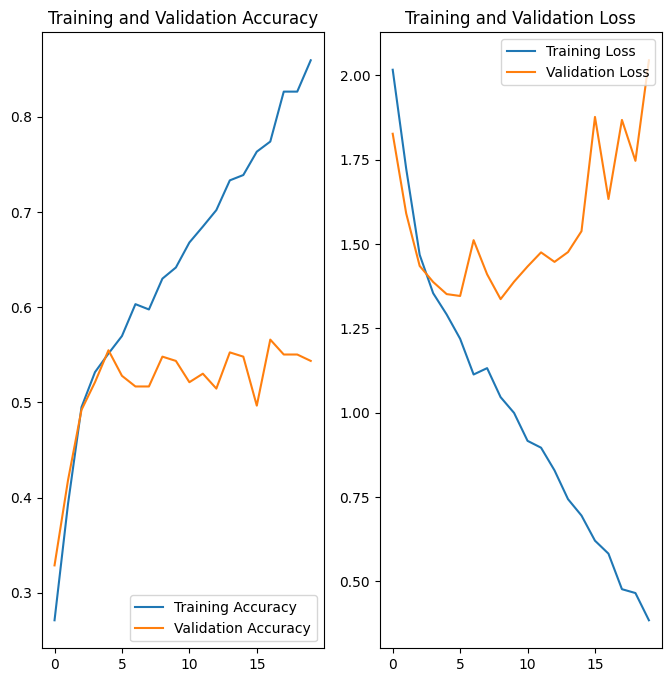

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### <font color='orange'> Model1 Inferenece: </font>                            
 <font color='orange'>1.We are able to achieve only about 55 percent accuracy in validation data.

 2.There is a huge overfitting because training accuracy kept on increasing whereas validation accuracy didnt increase significantly
</font>

# <font color='red'>Step5:Data Augmentation</font>

In [18]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape=(img_height,
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

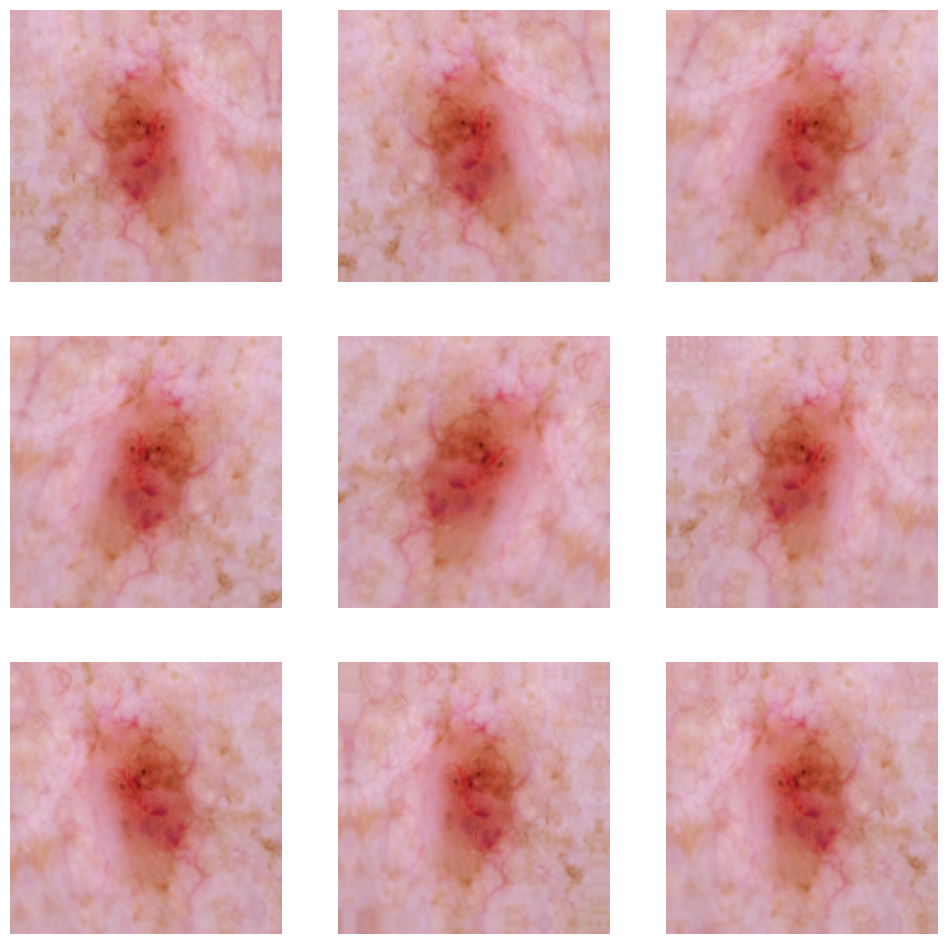

In [19]:
# visualize how your augmentation strategy works for one instance of training image.
plt.figure(figsize=(12, 12))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

# <font color='red'>Step6:Model Building & training after Augmentation</font>

### Create the model


In [20]:
#Sequential model
model = Sequential([
  #Include the data augmentation
  data_augmentation,

  #Rescaling
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

  #First convolution layer
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  #Second convolution layer
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  #Third convolution layer
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  #Dropout layer with 20%  of the input units to drop.
  layers.Dropout(0.2),

  #Flatten layer
  layers.Flatten(),

  #Fully connected layer
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='softmax')

])



### Compiling the model

In [21]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [22]:
#Show the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

### Training the model

In [23]:
#Train the model
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 4s 31ms/step - loss: 2.2131 - accuracy: 0.2411 - val_loss: 1.8729 - val_accuracy: 0.3490
Epoch 2/20
56/56 [==============================] - 2s 30ms/step - loss: 1.7031 - accuracy: 0.3912 - val_loss: 1.5839 - val_accuracy: 0.4966
Epoch 3/20
56/56 [==============================] - 2s 30ms/step - loss: 1.5287 - accuracy: 0.4654 - val_loss: 1.4605 - val_accuracy: 0.5302
Epoch 4/20
56/56 [==============================] - 2s 28ms/step - loss: 1.4224 - accuracy: 0.5017 - val_loss: 1.5019 - val_accuracy: 0.4743
Epoch 5/20
56/56 [==============================] - 2s 28ms/step - loss: 1.4109 - accuracy: 0.5056 - val_loss: 1.4154 - val_accuracy: 0.5235
Epoch 6/20
56/56 [==============================] - 2s 29ms/step - loss: 1.3695 - accuracy: 0.5234 - val_loss: 1.4256 - val_accuracy: 0.4877
Epoch 7/20
56/56 [==============================] - 2s 28ms/step - loss: 1.3704 - accuracy: 0.5084 - val_loss: 1.4249 - val_accuracy: 0.5369
Epoch 8/20
56

### Visualizing the results

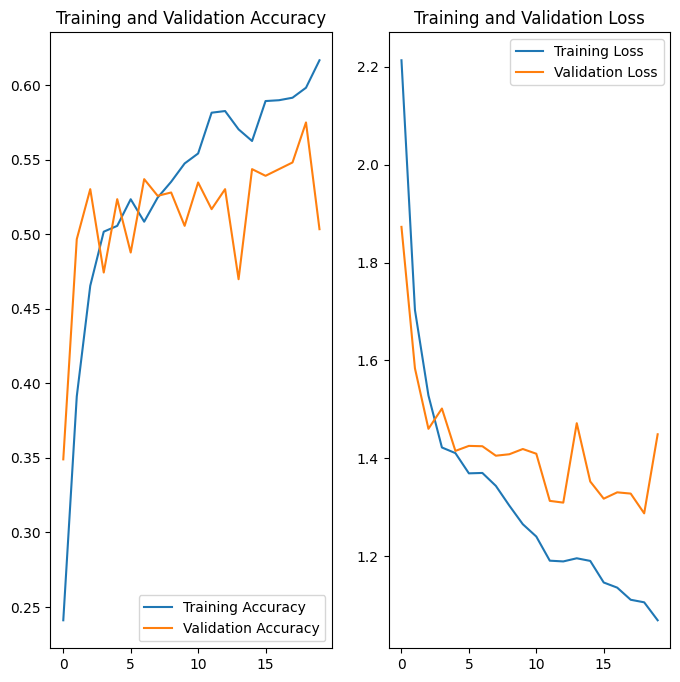

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### <font color='orange'> Model2 Inferenece: </font>                            
 <font color='orange'>1.After Image Augmentation we are able to reduce the overfitting considerably compared to Model1

</font>

# <font color='red'>Step7:Class distribution</font>

In [25]:
#Function to get the class count
def class_count(directory):
    count= []
    for path in pathlib.Path(directory).iterdir():
        if path.is_dir():
            count.append(len([name for name in os.listdir(path)
                               if os.path.isfile(os.path.join(path, name))]))
    #Each subdirectory is the name of a class
    sub_directory = [name for name in os.listdir(directory)
                    if os.path.isdir(os.path.join(directory, name))]

    #return dataframe with image count and class.
    return pd.DataFrame(list(zip(sub_directory,count)),columns =['Class', 'Image No.'])

df = class_count(data_dir_train)
df

,Class,Image No.
0,actinic keratosis,114
1,nevus,357
2,melanoma,438
3,basal cell carcinoma,376
4,seborrheic keratosis,77
5,vascular lesion,139
6,pigmented benign keratosis,462
7,dermatofibroma,95
8,squamous cell carcinoma,181


<Axes: xlabel='Image No.', ylabel='Class'>

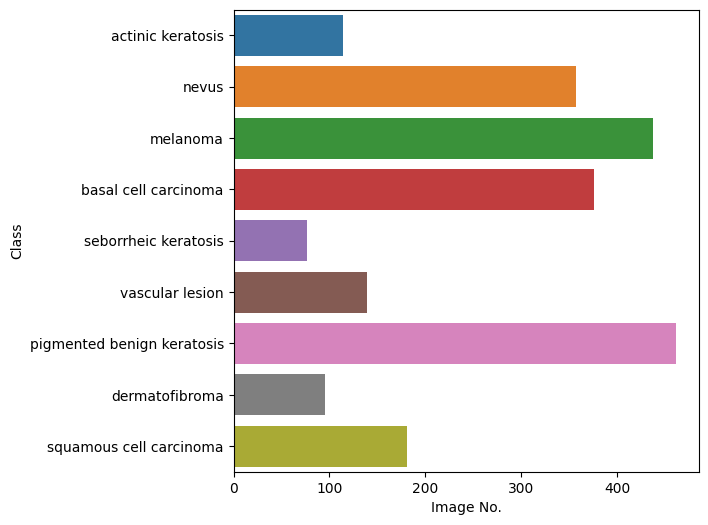

In [26]:
#Visualize the Number of images
import seaborn as sns
plt.figure(figsize=(6,6))
sns.barplot(x="Image No.", y="Class", data=df,
            label="Class")

#### <font color='orange'> Findings: </font>                            
 <font color='orange'>1.Pigmented benign keratosis has maximum samples.

<font color='orange'>2.Seborrheic keratosis has least number of samples.

</font>

# <font color='red'>Step8:Handling class imbalances</font>

Install Augmentor to be used for class imbalance

In [27]:
!pip install Augmentor

In [28]:
#Augmentor will add more samples across all classes so no class has fewer samples
path_to_training_dataset="/content/gdrive/MyDrive/Skincancer/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skincancer/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x78F0504C3B20>: 100%|██████████| 500/500 [00:20<00:00, 24.31 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skincancer/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x78F0DFF04910>: 100%|██████████| 500/500 [00:21<00:00, 23.59 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skincancer/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x78F050595F00>: 100%|██████████| 500/500 [00:23<00:00, 21.60 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skincancer/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3072x2304 at 0x78F0504A68F0>: 100%|██████████| 500/500 [01:11<00:00,  7.02 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skincancer/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=960x645 at 0x78F05036C040>: 100%|██████████| 500/500 [01:29<00:00,  5.58 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skincancer/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x78F0503078E0>: 100%|██████████| 500/500 [00:17<00:00, 28.66 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skincancer/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x78F05056CBB0>: 100%|██████████| 500/500 [00:37<00:00, 13.27 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skincancer/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x78F0506F4340>: 100%|██████████| 500/500 [00:17<00:00, 28.33 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skincancer/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x78F050436AD0>: 100%|██████████| 500/500 [00:18<00:00, 27.57 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [29]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [30]:
import glob
path_list = [x for x in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/gdrive/MyDrive/Skincancer/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0031228.jpg_b245b88d-fe2a-4178-99ee-11e0c19bb4cb.jpg',
 '/content/gdrive/MyDrive/Skincancer/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0031823.jpg_61c42a68-c38f-4bca-b463-bf3055d2763b.jpg',
 '/content/gdrive/MyDrive/Skincancer/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0028370.jpg_641357d4-550a-4776-baa2-df8d069274f1.jpg',
 '/content/gdrive/MyDrive/Skincancer/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0027884.jpg_f54b84f6-3421-46a7-b726-3e097b74f73a.jpg',
 '/content/gdrive/MyDrive/Skincancer/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026625.jpg_3a749857-e425-485c-a1b4-e72fd52515dc.jpg',
 '/content/gdrive/MyDrive/Skincancer/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026857.jpg_28d249c4-4f0d-4e76-b03f-aa97a8a98d6d.jpg',
 '/content/gdrive/MyDrive/Skincancer/Train/actinic keratosis/output/ac

In [31]:
lesion_list_new=[os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [32]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [33]:
path_list = [x for x in glob.glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesson_list = [os.path.basename(os.path.dirname(y)) for y in glob.glob(os.path.join(data_dir_train, '*', '*.jpg'))]
dataframe_dict = dict(zip(path_list, lesson_list))
original_df = pd.DataFrame(list(dataframe_dict.items()),columns = ['Path','Label'])

df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

<ipython-input-33-eb1c51d1c251>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = original_df.append(df2)


In [34]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

# <font color='red'>Step9:Model Building & training after handling Class Imbalance</font>

In [35]:
#BAtch size and image size
batch_size = 32
img_height = 180
img_width = 180

#### Create a training dataset

In [36]:
data_dir_train=os.path.join(data_dir_train)
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### <font color='orange'>Out of 6739 images,5392 are available for training  </font>

#### Create a validation dataset

In [37]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### <font color='orange'>Out of 6739 images,1347 are available for validation  </font>

#### Create your model (make sure to include normalization)

In [38]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]

#### Compile your model (Choose optimizer and loss function appropriately)

In [39]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### Train your model

In [40]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


169/169 [==============================] - 55s 303ms/step - loss: 1.2344 - accuracy: 0.5280 - val_loss: 1.1856 - val_accuracy: 0.5657
Epoch 2/30
169/169 [==============================] - 36s 207ms/step - loss: 1.1647 - accuracy: 0.5532 - val_loss: 1.1155 - val_accuracy: 0.5739
Epoch 3/30
169/169 [==============================] - 41s 234ms/step - loss: 1.1101 - accuracy: 0.5786 - val_loss: 1.0405 - val_accuracy: 0.5984
Epoch 4/30
169/169 [==============================] - 38s 218ms/step - loss: 1.0384 - accuracy: 0.6074 - val_loss: 1.0890 - val_accuracy: 0.6088
Epoch 5/30
169/169 [==============================] - 38s 216ms/step - loss: 1.0297 - accuracy: 0.6066 - val_loss: 1.0600 - val_accuracy: 0.6065
Epoch 6/30
169/169 [==============================] - 40s 232ms/step - loss: 0.9816 - accuracy: 0.6287 - val_loss: 1.0421 - val_accuracy: 0.6125
Epoch 7/30
169/169 [==============================] - 36s 205ms/step - loss: 0.9446 - accuracy: 0.6350 - val_loss: 0.8925 - val_accuracy: 0.6

#### Visualize the model results

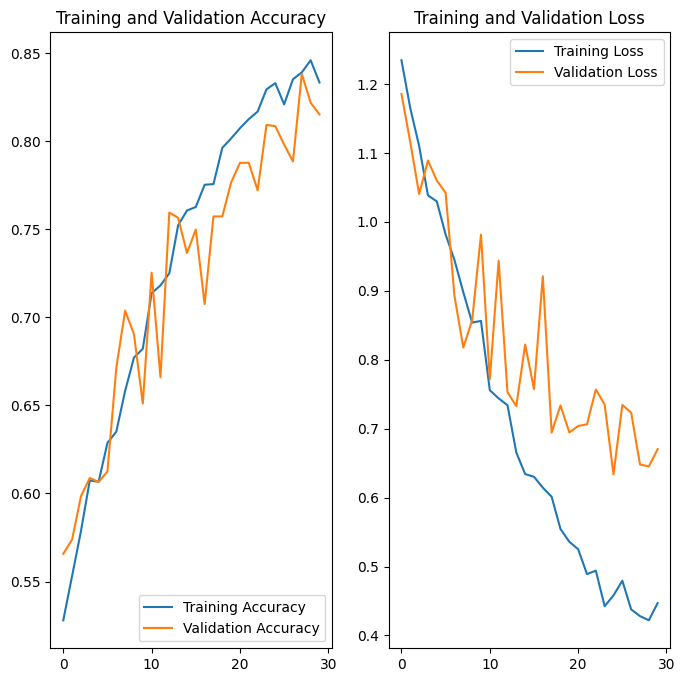

In [41]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### <font color='green'> Findings: </font>                            
 <font color='green'>1.Accuracy has increased and there is no overfitting.

<font color='green'>2.Handling Class imbalance helped to solve overfitting issue.

</font>

